In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
# чтение файлов

In [4]:
df = pd.read_pickle('../rfsd_data_with_workers_and_historical_data_and_predicted_workers_count.pck')

In [5]:
outer_borders = gpd.read_file('./outer_borders.shp')

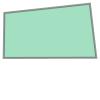

In [6]:
bord = outer_borders.geometry[0]
bord

In [7]:
geodf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)

In [8]:
geocity = geodf[geodf.within(bord) & (geodf.dissolution_date.isnull())]

In [9]:
len(geocity)

54853

In [10]:
geocity.combined_workers_count.sum()

np.float64(494059.2115918399)

In [156]:
# донасыщение данными dadata

In [21]:
to_get_from_dadata = geocity[geocity['geocoding_quality'] != 'house']

In [22]:
to_get_from_dadata

inn  year     region region_taxcode   age dissolution_date  \
460096   1660027265  2014  tatarstan             16  40.0              NaT   
460491   1659016854  2014  tatarstan             16  55.0              NaT   
460819   1658084611  2014  tatarstan             16   7.0              NaT   
461314   1657029992  2014  tatarstan             16  15.0              NaT   
462104   1655229065  2014  tatarstan             16   3.0              NaT   
...             ...   ...        ...            ...   ...              ...   
5032875  1200002102  2023   marij el             12   2.0              NaT   
5032899  1200002230  2023   marij el             12   2.0              NaT   
5032903  1200001606  2023   marij el             12   2.0              NaT   
5032975  1200000458  2023   marij el             12   2.0              NaT   
5034882  1106032491  2023       komi             11   7.0              NaT   

         filed     okved okved_section  okopf  ... line_2120 line_2200  \
460096     1.0      None           NaN  20101  ...       NaN       NaN   
460491     1.0  68.32.20             L  20701  ...       NaN       NaN   
460819     1.0     24.30             C  12300  ...     728.0      53.0   
461314     1.0     94.91             S  71500  ...       NaN       NaN   
462104     1.0     68.20             L  12300  ...       NaN       NaN   
...        ...       ...           ...    ...  ...       ...       ...   
5032875    1.0     31.09             C  12300  ...    8918.0     333.0   
5032899    1.0  56.10.10             I  12300  ...    2290.0    2037.0   
5032903    1.0     22.23             C  12300  ...  455626.0  -29015.0   
5032975    1.0     38.32             E  12300  ...   30017.0     410.0   
5034882    1.0  46.73.60             G  12300  ...    4506.0     127.0   

        line_2300 line_2350 line_2400  line_2500  workers_count  \
460096        NaN       NaN       NaN        NaN            NaN   
460491        NaN       NaN       NaN        NaN            NaN   
460819       41.0      12.0      37.0       37.0            NaN   
461314        NaN       NaN       NaN        NaN            NaN   
462104        NaN       NaN       NaN        NaN            NaN   
...           ...       ...       ...        ...            ...   
5032875     344.0      87.0     106.0      106.0            5.0   
5032899    1937.0     100.0    1706.0     1706.0            1.0   
5032903     787.0  234281.0     885.0      685.0           24.0   
5032975     177.0     233.0     217.0      137.0            1.0   
5034882     126.0       6.0     151.0      101.0            2.0   

         predicted_workers_count  combined_workers_count  \
460096                       NaN                0.000000   
460491                 18.845601               18.845601   
460819                  0.550193                0.550193   
461314                 11.360079               11.360079   
462104                  2.912920                2.912920   
...                          ...                     ...   
5032875                      NaN                5.000000   
5032899                      NaN                1.000000   
5032903                      NaN               24.000000   
5032975                      NaN                1.000000   
5034882                      NaN                2.000000   

                          geometry  
460096   POINT (49.12423 55.78235)  
460491   POINT (49.12423 55.78235)  
460819    POINT (49.06796 55.8491)  
461314   POINT (49.14739 55.83172)  
462104   POINT (49.14695 55.78872)  
...                            ...  
5032875  POINT (48.37923 55.88304)  
5032899  POINT (48.25951 56.31383)  
5032903  POINT (48.36186 55.86366)  
5032975  POINT (48.41305 55.96087)  
5034882   POINT (49.06716 55.8655)  

[36581 rows x 30 columns]

In [43]:
tokens = [{'email': 'gvaisberg@yandex.ru', 'token': '8f133def210da41a5800035baa5e82158ab3962e'},
          {'email': 'gri.sha.vaisberg@gmail.com', 'token': '88b0b8b6c56f4faf9e6286ca6f06ed7d776a24fc'},
          {'email': 'grisha.vaisberg@gmail.com', 'token': '5f095d9245dbe617d8b40c7588b825ab7f94a533'},
          {'email': 'rita1', 'token': 'f78446d26a280577636e755f0010afa0c6f92b25'},
          {'email': 'rita2', 'token': 'b6b1af99fb76f9305964f86db273d218f344319f'},
          {'email': 'gavaysberg@edu.hse.ru', 'token': 'b91d3ab90d4b35f3ccbaec60a751976e84f93a52'},
          {'email': 'grisha.vaisberg+2@gmail.com', 'token': '737312b14520c2126734c975f3ad488ccd66f0f2'},
          {'email': 'grisha.vaisberg+4@gmail.com', 'token': 'e878fdac664f71bd3cd7f9c242f62e8c92a04180'},
          {'email': 'grisha.vaisberg+5@gmail.com', 'token': '877afb0cfada5b7456b58f239f933e2d24a93f72'},
          {'email': 'gregory@dton.io', 'token': 'af8375a53d5f3b93d7c3092437031687d08a2655'},
          {'email': 'hi@dton.io', 'token': 'a5a5e1fb68092fc17f391174c3da7033340791cd'},
          {'email': 'nikita', 'token': '1e101df89e116da942a996457f8f23e4de525acf'}
         ]

In [24]:
from dadata import Dadata

In [25]:
not_found = list(to_get_from_dadata.inn)

In [27]:
# not_found_info_dadata = dict()
# totaly_not_found = list()

In [28]:
from tqdm.notebook import tqdm

In [31]:
len(not_found_info_dadata)

10794

In [44]:
token = tokens[11]['token']
dadata = Dadata(token)
for i in tqdm(not_found):
    inn = i
    if inn not in not_found_info_dadata:
        data = dadata.find_by_id("party", inn)
        if len(data):
            result = data[0]
            not_found_info_dadata[inn] = result
        else:
            totaly_not_found.append(inn)

  0%|          | 0/36581 [00:00<?, ?it/s]

In [45]:
len(not_found_info_dadata), len(totaly_not_found)

(36581, 0)

In [46]:
to_pd = []
for inn in not_found_info_dadata:
    i = not_found_info_dadata[inn]
    to_pd.append([i['value'], 
                  inn, 
                  not_found_info_dadata[inn]['data']['address']['data']['geo_lon'], 
                  not_found_info_dadata[inn]['data']['address']['data']['geo_lat']])

In [47]:
gdf = gpd.GeoDataFrame(to_pd, columns=['name', 'inn', 'lon', 'lat'])
gdf = gpd.GeoDataFrame(
    gdf, geometry=gpd.points_from_xy(gdf.lon, gdf.lat), crs="EPSG:4326"
)

In [49]:
# gdf.to_file('kazan_info_dadata_geojson.geojson')

In [11]:
geodadata = gpd.gpd.read_file('kazan_info_dadata_geojson.geojson')
geodadata = geodadata[geodadata.within(bord)]

In [12]:
geodadata['dadata_lon'] = geodadata['lon']
geodadata['dadata_lat'] = geodadata['lat']

In [13]:
geocity = geocity.merge(geodadata[['inn', 'dadata_lon', 'dadata_lat']], on='inn', how='left')


In [53]:
# import pandas as pd

# pd.set_option('display.max_columns', None)

In [14]:
geocity['dadata_lat'] = geocity['dadata_lat'].fillna(geocity['lat'])
geocity['dadata_lon'] = geocity['dadata_lon'].fillna(geocity['lon'])

In [15]:
geocity = gpd.GeoDataFrame(
    geocity, geometry=gpd.points_from_xy(geocity.dadata_lon, geocity.dadata_lat), crs="EPSG:4326"
)

In [16]:
geocity_simplified = geocity[['inn', 'dadata_lon', 'dadata_lat', 'workers_count', 'predicted_workers_count', 'combined_workers_count', 'line_2110', 'geometry']]


In [17]:
type(geocity_simplified)

geopandas.geodataframe.GeoDataFrame

In [18]:
geocity_simplified.to_csv('kazan_workers_count_dadata_coords_predicted.csv')

In [19]:
#no qgis

In [20]:
# загрузка районов

In [7]:
distr = gpd.read_file('work_places.shp')

In [8]:
distr

NO  CODE                                               NAME TYPENO  \
0      1  None  ÐÐ¸Ð¶Ð½ÐµÑÑÐ°ÑÐ¿ÑÐ³Ð¸Ð½ÑÐºÐ¾Ðµ ÑÐµÐ»ÑÑ...      0   
1      2  None  ÐÐ¾Ð»ÑÑÐµÐ°ÑÐ°ÑÑÑÑÐºÐ¾Ðµ ÑÐµÐ»ÑÑÐºÐ...      0   
2      3  None  ÐÐ¾Ð»ÑÑÐµÐ±Ð¸ÑÐ°Ð¼Ð°Ð½ÑÐºÐ¾Ðµ ÑÐµÐ»ÑÑÐ...      0   
3      4  None  ÐÑÑÐºÐ°ÑÐ¸Ð½ÑÐºÐ¾Ðµ ÑÐµÐ»ÑÑÐºÐ¾Ðµ Ð¿Ð¾...      0   
4      5  None  Ð¡Ð²Ð¸ÑÐ¶ÑÐºÐ¾Ðµ ÑÐµÐ»ÑÑÐºÐ¾Ðµ Ð¿Ð¾ÑÐµÐ»...      0   
..   ...   ...                                                ...    ...   
896  897  None                                               None      0   
897  898  None                                               None      0   
898  899  None                                               None      0   
899  900  None                                               None      0   
900  901  None                                               None      0   

    work_place                                           geometry  
0         None  POLYGON ((5375969.262 7495986.833, 5375885.346...  
1         None  POLYGON ((5385168.491 7502532.111, 5385168.491...  
2         None  POLYGON ((5464295.081 7593606.403, 5462946.429...  
3         None  POLYGON ((5520177.768 7560684.871, 5520265.644...  
4         None  POLYGON ((5412364.463 7521534.348, 5413287.724...  
..         ...                                                ...  
896       None  POLYGON ((5470318.683 7585429.603, 5471707.72 ...  
897       None  POLYGON ((5478291.444 7568792.523, 5474165.766...  
898       None  POLYGON ((5479421.764 7566625.988, 5478822.879...  
899       None  POLYGON ((5447213.11 7568543.447, 5447021.114 ...  
900       None  POLYGON ((5450574.205 7573768.305, 5449205.57 ...  

[901 rows x 6 columns]

In [24]:
districts_df = distr.set_index('NO')

In [25]:
districts_df.crs = "EPSG:3857"

In [26]:
districts_df['simetra_workers_count'] = districts_df.work_place

In [27]:
companies_df = geocity_simplified.to_crs('EPSG:3857')

In [28]:
import contextily as cx


In [29]:
## визуализация

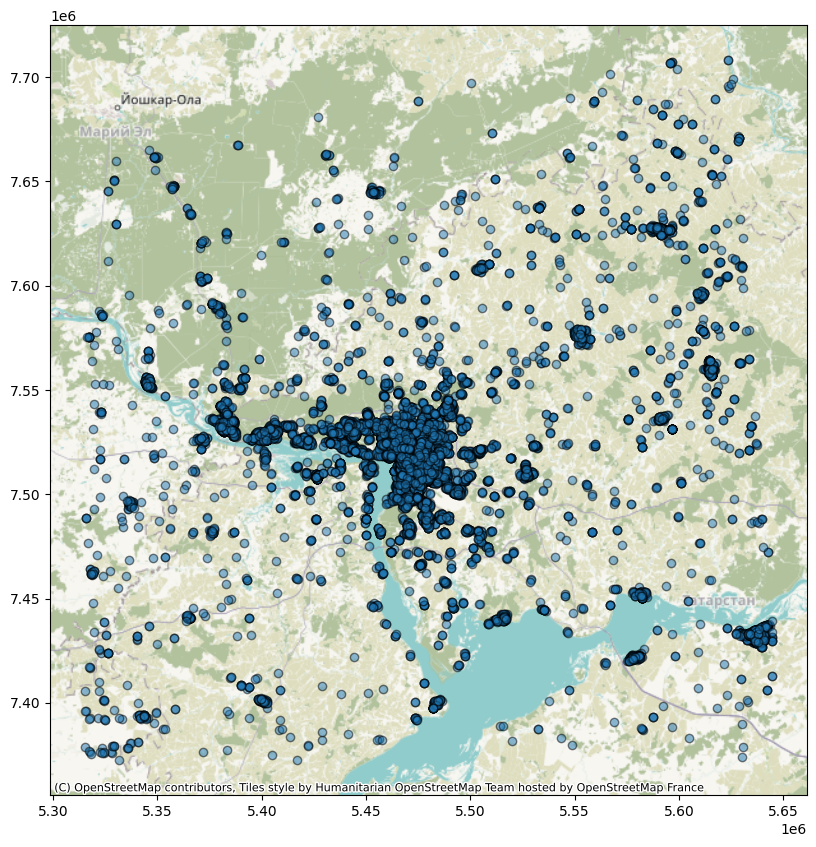

In [30]:
ax = companies_df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

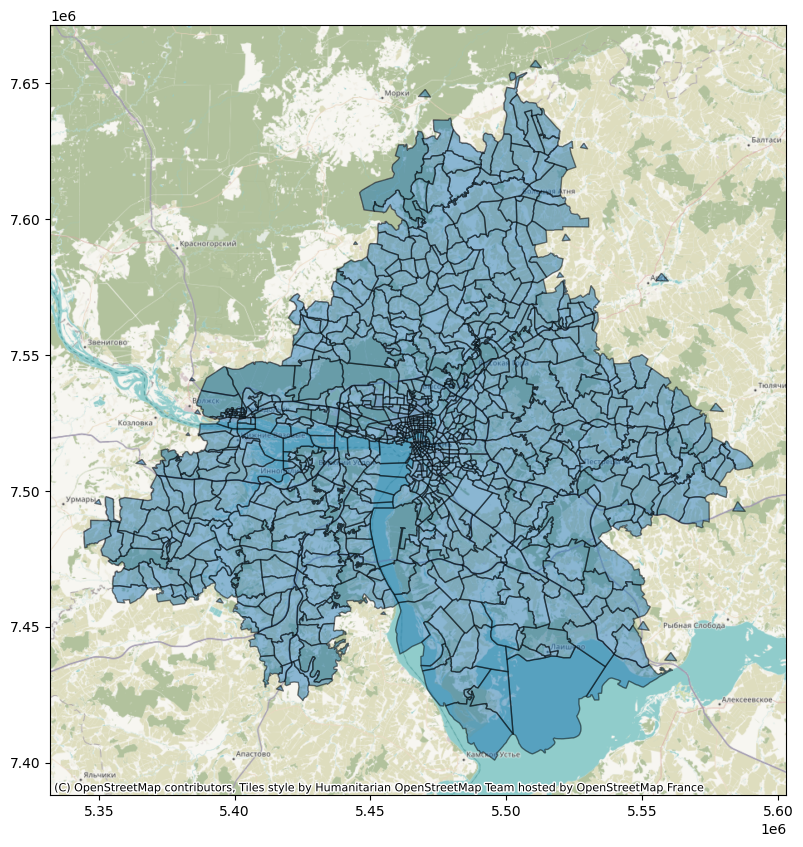

In [31]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)

In [32]:
## aggregation

In [33]:
joined = gpd.sjoin(companies_df, districts_df, predicate='within', how='left')

In [34]:
districts_df['workers_count'] = joined.groupby('NO')['workers_count'].sum()
districts_df['workers_count'] = districts_df['workers_count'].fillna(0)
districts_df['combined_workers_count'] = joined.groupby('NO')['combined_workers_count'].sum()
districts_df['combined_workers_count'] = districts_df['combined_workers_count'].fillna(0)

In [35]:
districts_df.combined_workers_count.sum(), districts_df.workers_count.sum()

(np.float64(428913.90021370526), np.float64(302686.0))

In [36]:
districts_df.simetra_workers_count.sum()

np.float64(737216.28)

In [77]:
302686 /737216

0.4105798029342825

In [37]:
districts_df.simetra_workers_count.max()

np.float64(14029.08)

In [38]:
quantile_edges = districts_df['simetra_workers_count'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0])

In [39]:
bins = sorted(list(set(quantile_edges.values)))

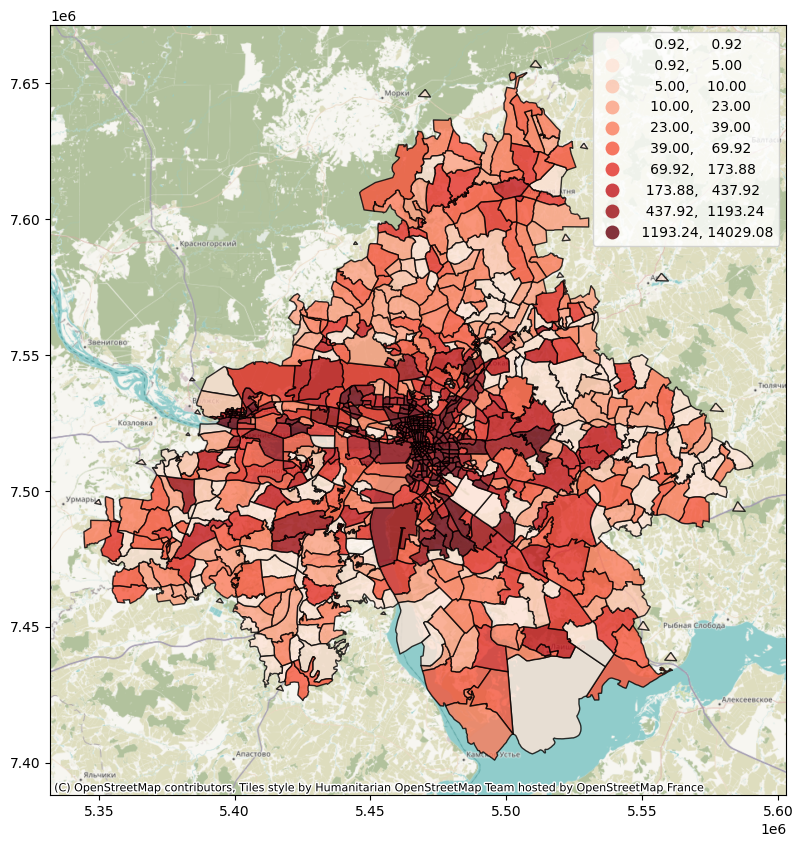

In [40]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="simetra_workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

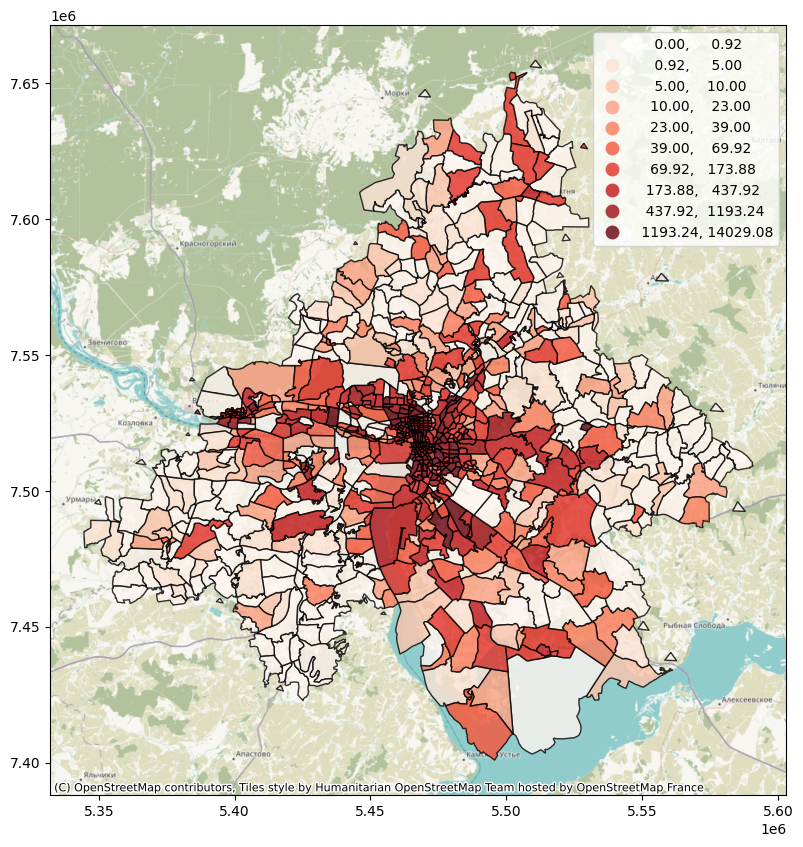

In [41]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="combined_workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

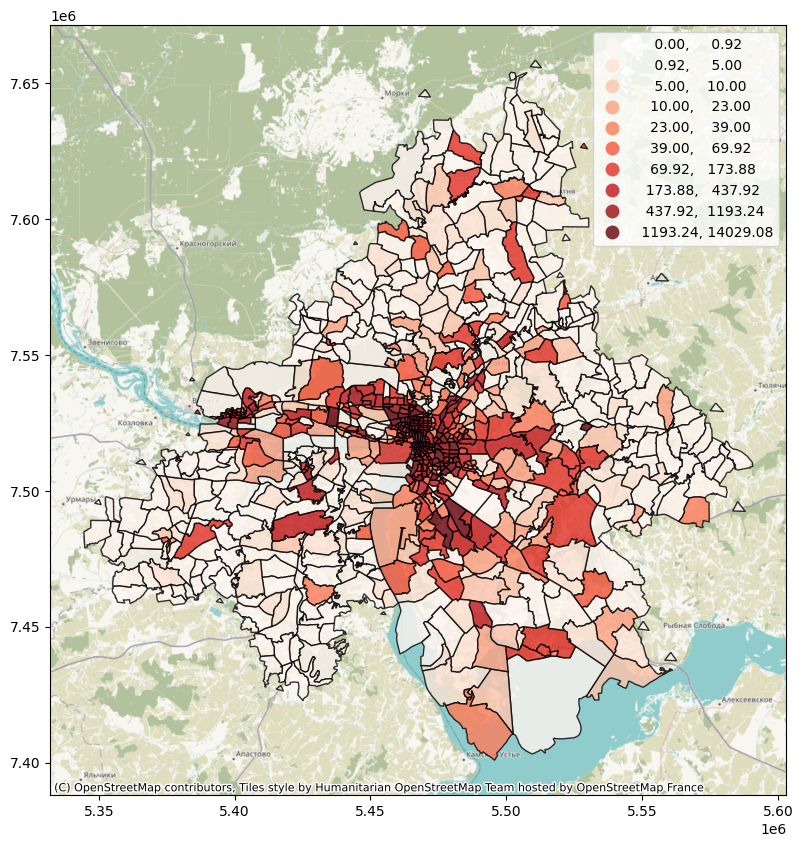

In [42]:
ax = districts_df.plot(figsize=(10, 10), alpha=0.8, edgecolor="k", column="workers_count", 
                       scheme='user_defined',      # пользовательские интервалы
                       classification_kwds={'bins': bins},
                       cmap='Reds', legend=True)
cx.add_basemap(ax)

In [43]:
## корреляция

In [44]:
districts_df.simetra_workers_count.corr(districts_df.workers_count)

np.float64(0.7081302265369119)

In [45]:
districts_df.simetra_workers_count.corr(districts_df.combined_workers_count)

np.float64(0.766640756394786)

In [46]:
## среднеквадратичное отклонение

In [47]:
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [48]:
rmse(districts_df.simetra_workers_count, districts_df.workers_count)

np.float64(1322.3370741988088)

In [49]:
rmse(districts_df.simetra_workers_count, districts_df.combined_workers_count)

np.float64(1148.4987885876114)

In [50]:
## среднее относительное отклонение

In [51]:
districts_df['base_mre'] = (np.abs(districts_df.simetra_workers_count - districts_df.workers_count)/districts_df.simetra_workers_count)
districts_df['combined_mre'] = (np.abs(districts_df.simetra_workers_count - districts_df.combined_workers_count)/districts_df.simetra_workers_count)
districts_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
districts_df['base_mre'].describe()

count    901.000000
mean       1.286468
std        7.956530
min        0.000000
25%        0.677087
50%        0.932449
75%        1.000000
max      217.000000
Name: base_mre, dtype: float64

In [53]:
districts_df['combined_mre'].describe()

count    901.000000
mean       1.483346
std        8.691725
min        0.000787
25%        0.521459
50%        0.849083
75%        1.000000
max      217.000000
Name: combined_mre, dtype: float64

In [54]:
import matplotlib.pyplot as plt

def plot_arr(arr, ax=None):
    ys = arr
    xs = [x for x in range(len(ys))]

    if ax:
        ax = plt.plot(xs, ys)
        return
    plt.plot(xs, ys)
    plt.show()
    # Make sure to close the plt object once done
    plt.close()

In [55]:
districts_df.to_csv('kazan_res.csv')

In [56]:
districts_df['base_mre'].median()

np.float64(0.9324490297224269)

In [57]:
districts_df['combined_mre'].median()

np.float64(0.8490834258924524)

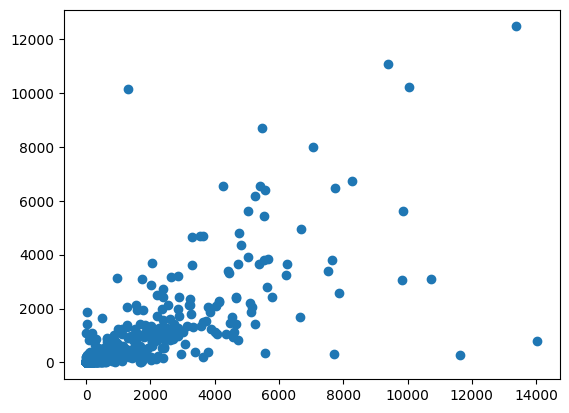

In [58]:
import matplotlib.pyplot as plt
plt.scatter(districts_df['simetra_workers_count'], districts_df['combined_workers_count'])

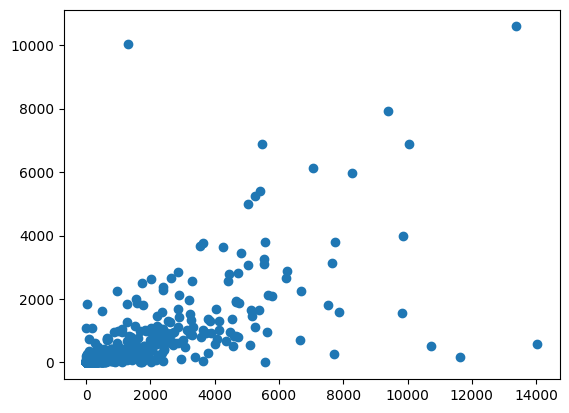

In [59]:
plt.scatter(districts_df['simetra_workers_count'], districts_df['workers_count'])

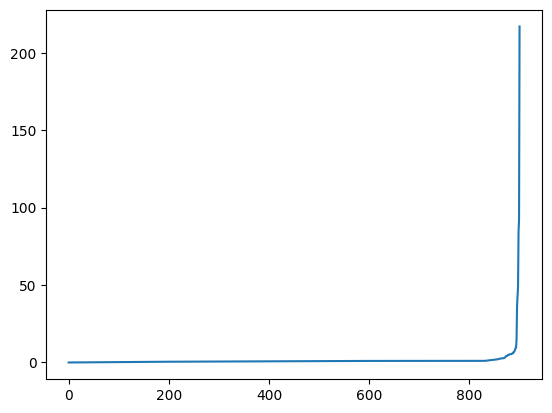

In [60]:
plot_arr(districts_df.sort_values('combined_mre')['combined_mre'])

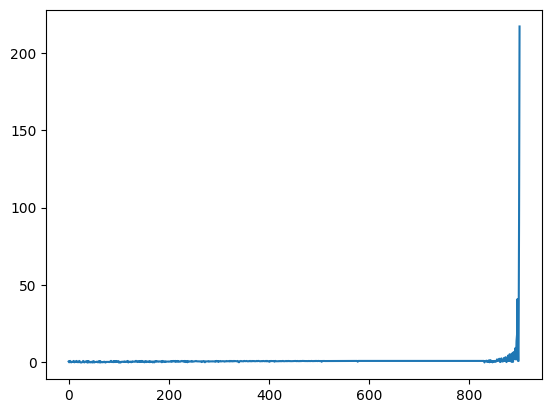

In [61]:
plot_arr(districts_df.sort_values('combined_mre')['base_mre'])

In [62]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [63]:
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

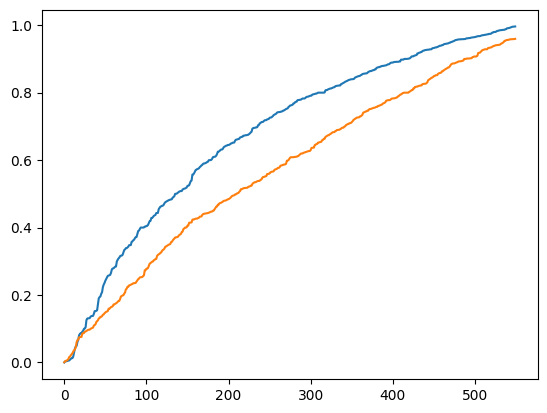

In [64]:
plot_arr(districts_df.sort_values('base_mre')['base_mre'][:550], ax1)
plot_arr(districts_df.sort_values('combined_mre')['combined_mre'][:550], ax2)

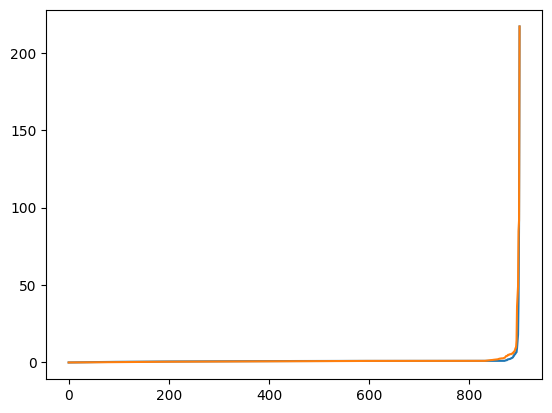

In [65]:
plot_arr(districts_df.sort_values('base_mre')['base_mre'], ax1)
plot_arr(districts_df.sort_values('combined_mre')['combined_mre'], ax2)

In [66]:
len(districts_df)

901

In [67]:
districts_df.base_mre.describe()

count    901.000000
mean       1.286468
std        7.956530
min        0.000000
25%        0.677087
50%        0.932449
75%        1.000000
max      217.000000
Name: base_mre, dtype: float64

In [68]:
districts_df.combined_mre.describe()

count    901.000000
mean       1.483346
std        8.691725
min        0.000787
25%        0.521459
50%        0.849083
75%        1.000000
max      217.000000
Name: combined_mre, dtype: float64

In [78]:
from sklearn.metrics import r2_score

only_good = districts_df

r2_base = r2_score(only_good['simetra_workers_count'], only_good['workers_count'])
r2_combined = r2_score(only_good['simetra_workers_count'], only_good['combined_workers_count'])

In [70]:
r2_score(districts_df['simetra_workers_count'], districts_df['workers_count']), r2_score(districts_df['simetra_workers_count'], districts_df['combined_workers_count'])


(0.39860551929280263, 0.5463340627552257)

In [79]:
r2_base, r2_combined

(0.39860551929280263, 0.5463340627552257)

In [72]:
only_good.simetra_workers_count.corr(only_good.workers_count)

np.float64(0.765832415950054)

In [73]:
only_good.simetra_workers_count.corr(only_good.combined_workers_count)

np.float64(0.8105071065839581)

In [74]:
rmse(only_good.simetra_workers_count, only_good.workers_count)

np.float64(1533.353886699349)

In [75]:
rmse(only_good.simetra_workers_count, only_good.combined_workers_count)

np.float64(1280.1764302397469)